Shapes: y = (100, 100), dy = (100, 100)
Iteration 1, loss = 0.12401913
Iteration 2, loss = 0.12091201
Iteration 3, loss = 0.11793106
Iteration 4, loss = 0.11508628
Iteration 5, loss = 0.11238447
Iteration 6, loss = 0.10983048
Iteration 7, loss = 0.10742747
Iteration 8, loss = 0.10517692
Iteration 9, loss = 0.10307904
Iteration 10, loss = 0.10113300
Iteration 11, loss = 0.09933653
Iteration 12, loss = 0.09768483
Iteration 13, loss = 0.09616973
Iteration 14, loss = 0.09477949
Iteration 15, loss = 0.09349885
Iteration 16, loss = 0.09230961
Iteration 17, loss = 0.09119192
Iteration 18, loss = 0.09012598
Iteration 19, loss = 0.08909391
Iteration 20, loss = 0.08808119
Iteration 21, loss = 0.08707757
Iteration 22, loss = 0.08607729
Iteration 23, loss = 0.08507891
Iteration 24, loss = 0.08408455
Iteration 25, loss = 0.08309877
Iteration 26, loss = 0.08212698
Iteration 27, loss = 0.08117368
Iteration 28, loss = 0.08024062
Iteration 29, loss = 0.07932588
Iteration 30, loss = 0.07842407
Iteration

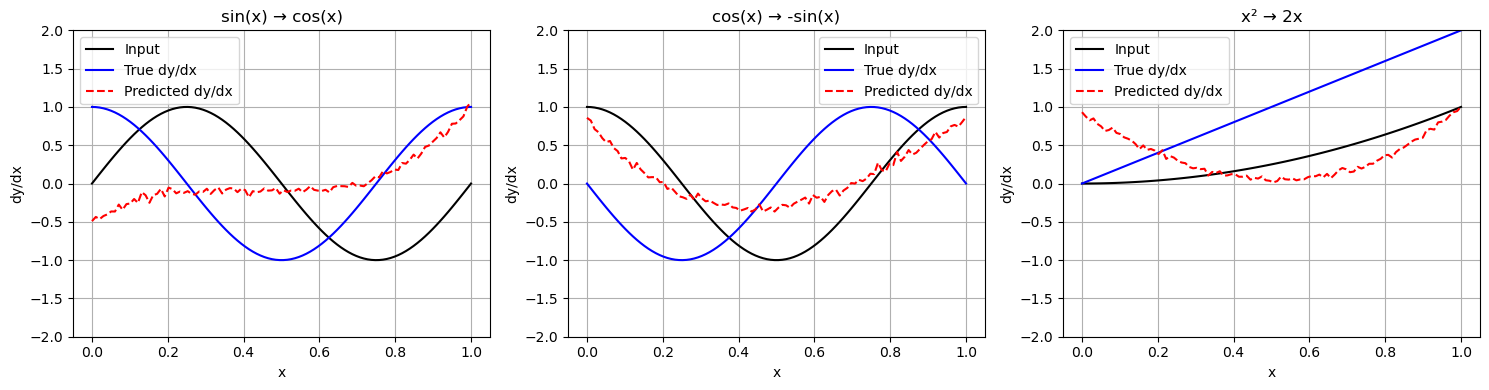

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# --- Geradores de polinômios específicos ---
def poly_cubic(x, A, a):
    y = A * (x**2 - a**2) * x
    dy = A * (3 * x**2 - a**2)
    return y, dy

def poly_quartic(x, A, a, b):
    y = A * (x**2 - a**2) * (x**2 - b**2)
    dy = A * (4 * x**3 - 2 * (a**2 + b**2) * x)
    return y, dy

def normalize_with_noise(data, noise_level=0.05):
    norm = data / np.max(np.abs(data))
    noise = noise_level * np.random.randn(*data.shape)
    return norm + noise

def generate_data_specific_polynomials(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y_all, dy_all = [], []

    for i in range(qtde):
        A = np.random.uniform(0.5, 2)
        if i % 2 == 0:
            a = np.random.uniform(0.2, 0.8)
            y, dy = poly_cubic(x, A, a)
        else:
            a = np.random.uniform(0.2, 0.7)
            b = np.random.uniform(0.8, 1.0)
            y, dy = poly_quartic(x, A, a, b)

        y_all.append(normalize_with_noise(y))
        dy_all.append(normalize_with_noise(dy))

    y_stack = np.hstack(y_all).T
    dy_stack = np.hstack(dy_all).T
    return y_stack, dy_stack

# --- Geração de dados com mais pontos (nx=100) ---
nx = 100
y, dy = generate_data_specific_polynomials(nx, 100)
print(f"Shapes: y = {y.shape}, dy = {dy.shape}")

# --- Separar treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

# --- MLPRegressor ---
model = MLPRegressor(
    hidden_layer_sizes=(10,) * 10,
    activation='tanh',
    solver='adam',
    max_iter=100000,
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    n_iter_no_change=50,
    tol=1e-8,
    verbose=True
)

# --- Treinamento ---
model.fit(X_train, y_train)

# --- Avaliação ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.6f}")

# --- Função de plotagem ---
def plot_derivative_comparison(new_y, true_dy, title, ax):
    predicted_derivative = model.predict(new_y)
    x_axis = np.linspace(0, 1, new_y.shape[1])
    ax.plot(x_axis, new_y[0], label='Input', color='black')
    ax.plot(x_axis, true_dy[0], label='True dy/dx', color='blue')
    ax.plot(x_axis, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
    ax.set_title(title)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('x')
    ax.set_ylabel('dy/dx')
    ax.legend()
    ax.grid(True)

# --- Testes ---
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

new_x = np.linspace(0, 1, nx).reshape(1, -1)

# Teste 1: seno
new_y = np.sin(2 * np.pi * new_x)
new_dy = np.cos(2 * np.pi * new_x)
plot_derivative_comparison(new_y, new_dy, "sin(x) → cos(x)", axs[0])

# Teste 2: cosseno
new_y = np.cos(2 * np.pi * new_x)
new_dy = -np.sin(2 * np.pi * new_x)
plot_derivative_comparison(new_y, new_dy, "cos(x) → -sin(x)", axs[1])

# Teste 3: quadrado
new_y = new_x ** 2
new_dy = 2 * new_x
plot_derivative_comparison(new_y, new_dy, "x² → 2x", axs[2])

plt.tight_layout()
plt.show()

